# Inteferencia en el Biprisma de Fresnel

La irradiancia de las ondas provenientes de fuentes 

$$I = I_0\cos^2(\dfrac{\delta}{2})$$

con $$\delta = \dfrac{4\pi \cdot d \cdot \alpha \cdot (n-1) \cdot y}{(d+D)\lambda}$$

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
pi = np.pi
alpha = 0.5*pi/180
lamb = 632.8e-9
n = 1.5231
d1 = 16.7e-2
d2 = 3.3e-2
D = 338.5e-2

In [31]:
def delta(alpha,n,lamb,d,D):
    return lambda y: (4*pi*d*alpha*(n-1)*y)/((d+D)*lamb)

In [32]:
delta1_fun = delta(alpha,n,lamb,d1,D)
delta2_fun = delta(alpha,n,lamb,d2,D)

In [33]:
y1 = np.linspace(-5.0e-3,5.0e-3,250)
y2 = np.linspace(-10.0e-3,10.0e-3,250)

In [34]:
delta1 = delta1_fun(y1)
delta2 = delta2_fun(y2)

In [35]:
I1 = (np.cos(delta1/2))**2
I2 = (np.cos(delta2/2))**2

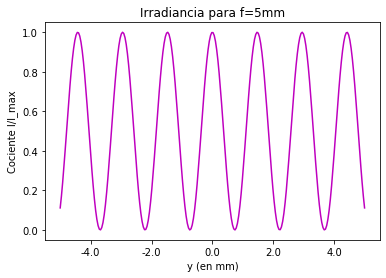

In [36]:
plt.plot(y1,I1,'m')
plt.xticks([-0.004,-0.002,0,0.002,0.004],['-4.0','-2.0','0.0','2.0','4.0'])
plt.xlabel('y (en mm)')
plt.ylabel('Cociente I/I_max')
plt.title('Irradiancia para f=5mm')
plt.show()

In [37]:
x = np.linspace(0,1,10)

In [44]:
xx, yy1 = np.meshgrid(x,y1)
xx, yy2 = np.meshgrid(x,y2)
delta1grid = delta1_fun(yy1)
delta2grid = delta2_fun(yy2)
I1grid = (np.cos(delta1grid/2))**2
I2grid = (np.cos(delta2grid/2))**2

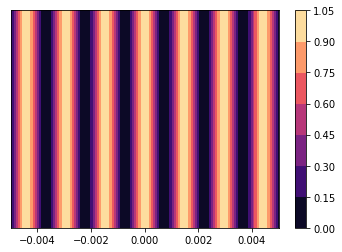

In [45]:
uwu = plt.contourf(yy,xx,I1grid,cmap='magma')
plt.colorbar(uwu)
plt.yticks([],[])
plt.show()

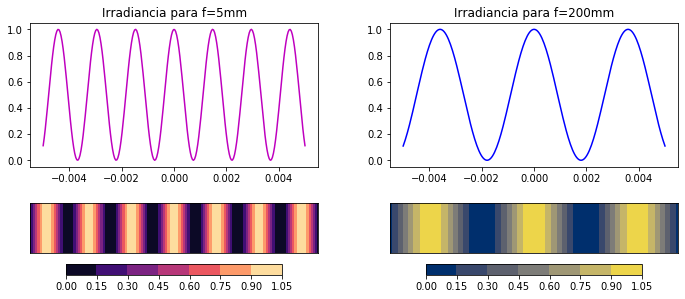

In [127]:
#fig,((ax11,ax12)) = plt.subplots(1,2, figsize = (10,5))
fig = plt.figure(figsize=(10,5))
ax11 = fig.add_axes([0.05,0.50,0.4,0.4])
ax12 = fig.add_axes([0.550,0.50,0.4,0.4])
ax21 = fig.add_axes([0.05,0.2,0.4,0.2])
ax22 = fig.add_axes([0.550,0.2,0.4,0.2])

#Irradiancia para f=5mm
ax11.plot(y,I1,'m')
ax11.set_xticks([-0.004,-0.002,0,0.002,0.004])
ax11.set_title('Irradiancia para f=5mm')

ir1 = ax21.contourf(yy1,xx,I1grid,cmap='magma')
fig.colorbar(ir1, ax=ax21, orientation="horizontal")
ax21.axes.get_xaxis().set_visible(False)
ax21.axes.get_yaxis().set_visible(False)

#Irradiancia para f=10mm
ax12.plot(y,I2,'b')
ax22.set_xticks([-0.0075,0,0.0075]) 
ax12.set_title('Irradiancia para f=200mm')

ir2 = ax22.contourf(yy2,xx,I2grid,cmap='cividis')
fig.colorbar(ir2,ax=ax22,orientation="horizontal")
ax22.axes.get_xaxis().set_visible(False)
ax22.axes.get_yaxis().set_visible(False)

plt.show()
fig.savefig("interference.png")